In [1]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import glob
import pandas as pd
import warnings
import pickle
import arrow
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc
import gsw

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [2]:
def OmA_2D(grid,carp):
    tsal = grid['vosaline'][0,0,:,:]
    ttemp = grid['votemper'][0,0,:,:]
    tdic = carp['dissolved_inorganic_carbon'][0,0,:,:]
    tta = carp['total_alkalinity'][0,0,:,:]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tpressure[:] =1
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(898,398)
    OmAr = OmegaA.reshape(898,398)
    OmCr = OmegaC.reshape(898,398)
    pco2r = pco2.reshape(898,398)
    
    return pHr, OmAr, OmCr, pco2r

Text(0.5, 1.0, 'individual stations')

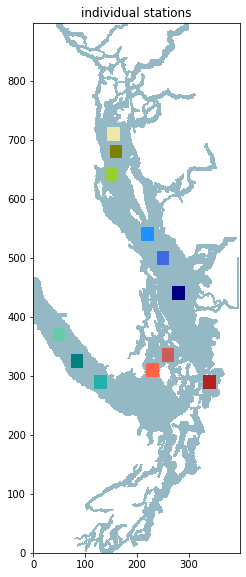

In [3]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

ax0.set_title('individual stations')



In [10]:
start ='2018-06-01'
end ='2018-09-30'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

pco2_2018 = np.zeros([dayslen,3])
nit_10m_2018 = np.zeros([dayslen,3])
diat_10m_2018 = np.zeros([dayslen,3])

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')
    DD = tdate.format('DD')
    mon = tdate.format('MMM').lower()
    yd = f'{DD}{mon}18'
    
    if i%2 == 0:
        print(ymd)
    tstr = glob.glob(f'/results2/SalishSea/nowcast-green.201905/{yd}/SalishSea_1d_*{ymd}*carp_T.nc')
    tnc = tstr[0]; tn_carp = nc.Dataset(tnc)
    
    tstr = glob.glob(f'/results2/SalishSea/nowcast-green.201905/{yd}/SalishSea_1d_*{ymd}*grid_T.nc')
    tnc = tstr[0]; tn_grid = nc.Dataset(tnc)
    pHr, OmAr, OmCr, pco2r = OmA_2D(tn_grid,tn_carp)
    pco2r[pco2r>1e10] = np.nan
    tstr = glob.glob(f'/results2/SalishSea/nowcast-green.201905/{yd}/SalishSea_1d_*{ymd}*ptrc_T.nc')
    tnc = tstr[0]; tn_ptrc = nc.Dataset(tnc)
    
    pco2_2018[i,0] = np.nanmean(pco2r[ns_y-10:ns_y+10,ns_x-10:ns_x+10])
    pco2_2018[i,1] = np.nanmean(pco2r[ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])
    pco2_2018[i,2] = np.nanmean(pco2r[ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])
    
    nit_10m_2018[i,0] = np.nanmean(tn_ptrc['nitrate'][0,0:10,ns_y-10:ns_y+10,ns_x-10:ns_x+10])
    diat_10m_2018[i,0] = np.nanmean(tn_ptrc['diatoms'][0,0:10,ns_y-10:ns_y+10,ns_x-10:ns_x+10])
    
    nit_10m_2018[i,1] = np.nanmean(tn_ptrc['nitrate'][0,0:10,ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])
    diat_10m_2018[i,1] = np.nanmean(tn_ptrc['diatoms'][0,0:10,ns2_y-10:ns2_y+10,ns2_x-10:ns2_x+10])

    nit_10m_2018[i,2] = np.nanmean(tn_ptrc['nitrate'][0,0:10,ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])
    diat_10m_2018[i,2] = np.nanmean(tn_ptrc['diatoms'][0,0:10,ns3_y-10:ns3_y+10,ns3_x-10:ns3_x+10])


pickle.dump(nit_10m_2018, open("nit_10m_2018.pkl", 'wb'))
pickle.dump(diat_10m_2018, open("diat_10m_2018.pkl", 'wb'))
pickle.dump(pco2_2018, open("pco2_2018.pkl", 'wb'))


20180601
20180603
20180605
20180607
20180609
20180611
20180613
20180615
20180617
20180619
20180621
20180623
20180625
20180627
20180629
20180701
20180703
20180705
20180707
20180709
20180711
20180713
20180715
20180717
20180719
20180721
20180723
20180725
20180727
20180729
20180731
20180802
20180804
20180806
20180808
20180810
20180812
20180814
20180816
20180818
20180820
20180822
20180824
20180826
20180828
20180830
20180901
20180903
20180905
20180907
20180909
20180911
20180913
20180915
20180917
20180919
20180921
20180923
20180925
20180927
20180929


In [ ]:
pickle.dump(nit_10m_2020, open("nit_10m_2020.pkl", 'wb'))
pickle.dump(diat_10m_2020, open("diat_10m_2020.pkl", 'wb'))
pickle.dump(pco2_2020, open("pco2_2020.pkl", 'wb'))


In [ ]:
tn_carp['dissolved_inorganic_carbon']

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[1].plot(np.arange(0,365,1),sorted_discharge_1946_1951[0,c,y,:], color = cols[c],linestyle = '-')\
axs[1].plot(np.arange(0,365,1),sorted_discharge_1946_1951[1,c,y,:], color = cols[c],linestyle = ':')}

#plot one to one line
